---
title: "Holiday Movies"
author: "Sophia Stang"
date: 2025-04-08
categories: [python, pandas, movies] # tags for a blog post (e.g., python)
image: "elf_image.jpeg"

toc: true
---

In [1]:
import pandas as pd

In [2]:
holiday_movies = pd.read_csv("https://bcdanl.github.io/data/holiday_movies.csv")
holiday_movies

,tconst,title_type,primary_title,simple_title,year,runtime_minutes,average_rating,num_votes
0,tt0020356,movie,Sailor's Holiday,sailors holiday,1929,58.0,5.4,55
1,tt0020823,movie,The Devil's Holiday,the devils holiday,1930,80.0,6.0,242
2,tt0020985,movie,Holiday,holiday,1930,91.0,6.3,638
3,tt0021268,movie,Holiday of St. Jorgen,holiday of st jorgen,1930,83.0,7.4,256
4,tt0021377,movie,Sin Takes a Holiday,sin takes a holiday,1930,81.0,6.1,740
...,...,...,...,...,...,...,...,...
2260,tt9747440,tvMovie,A Christmas Love Story,a christmas love story,2019,84.0,6.9,1652
2261,tt9747450,tvMovie,Holiday for Heroes,holiday for heroes,2019,81.0,7.0,1655
2262,tt9802890,tvMovie,Christmas Jars,christmas jars,2019,93.0,7.3,914
2263,tt9815084,tvMovie,A Very British Christmas,a very british christmas,2019,90.0,5.7,725


In [6]:
holiday_movie_genres = pd.read_csv("https://bcdanl.github.io/data/holiday_movie_genres.csv")
holiday_movie_genres

,tconst,genres
0,tt0020356,Comedy
1,tt0020823,Drama
2,tt0020823,Romance
3,tt0020985,Comedy
4,tt0020985,Drama
...,...,...
4526,tt9815084,Family
4527,tt9815084,Romance
4528,tt9892854,Comedy
4529,tt9892854,Drama


#2000s Movies Ordered By Rating

In [7]:
holiday_movies_2000s = holiday_movies[holiday_movies['year']>=2000]
movies_2000s_by_rating = holiday_movies_2000s.sort_values('average_rating', ascending = True)
movies_2000s_by_rating

,tconst,title_type,primary_title,simple_title,year,runtime_minutes,average_rating,num_votes
2179,tt8941352,video,A Grinch Christmas Carol,a grinch christmas carol,2012,2.0,1.0,41
1797,tt4009460,movie,Kirk Cameron's Saving Christmas,kirk camerons saving christmas,2014,79.0,1.3,16608
854,tt1242748,video,Johnson Family Christmas Dinner,johnson family christmas dinner,2008,88.0,1.5,127
927,tt13180242,tvMovie,A Christmas Call,a christmas call,2020,NaN,1.5,11
1610,tt2578608,movie,Krampus: The Christmas Devil,krampus the christmas devil,2013,82.0,1.6,1963
...,...,...,...,...,...,...,...,...
1416,tt21308838,video,Aunty Donna: Always Room for Christmas Pud,aunty donna always room for christmas pud,2018,4.0,9.3,24
1601,tt25147828,movie,Cheap vs. Expensive Xmas Day,cheap vs expensive xmas day,2022,107.0,9.5,14
1522,tt2273141,video,Christmas Bone Us,christmas bone us,2012,6.0,9.8,10
1433,tt21411946,movie,Bringing Back Christmas,bringing back christmas,2023,NaN,9.9,20


#Top Rated Movies of the 2000s

In [8]:
holiday_movies_2000s = holiday_movies[holiday_movies['year']>=2000]
top_movies_2000s = holiday_movies_2000s.loc[holiday_movies_2000s.groupby('year')['average_rating'].idxmax()]
top_movies_2000s[['primary_title', 'year', 'average_rating']]

,primary_title,year,average_rating
273,A Christmas Tree and a Wedding,2000,8.3
443,Andy Williams - Best of Christmas,2001,8.3
531,Santa Claus Versus the Christmas Vixens,2002,9.1
508,An X-Mas Message from David X. Cohen,2003,8.7
487,EastEnders: Christmas Party,2004,9.0
566,Brian Setzer: Christmas Extravaganza,2005,8.7
564,Christmas and the Civil War,2006,9.3
1042,A WowieBozowee Christmas,2007,9.1
1275,The Untold Christmas Story,2008,8.1
1204,NLO Spirit of Christmas,2009,10.0


#Genres of the Top Rated Christmas Movies Throughout the 2000s

In [9]:
movies_and_genres = pd.merge(top_movies_2000s, holiday_movie_genres, on = ['tconst'], how = 'left')
genre_dat = movies_and_genres[['primary_title', 'average_rating', 'genres']]
genre_dat.set_index('genres')

,primary_title,average_rating
genres,,
Drama,A Christmas Tree and a Wedding,8.3
Documentary,Andy Williams - Best of Christmas,8.3
Comedy,Santa Claus Versus the Christmas Vixens,9.1
Short,Santa Claus Versus the Christmas Vixens,9.1
Comedy,An X-Mas Message from David X. Cohen,8.7
Short,An X-Mas Message from David X. Cohen,8.7
Comedy,EastEnders: Christmas Party,9.0
Family,EastEnders: Christmas Party,9.0
Music,EastEnders: Christmas Party,9.0


#Most Common Genres for Top Rated Movies in the 2000s

In [34]:
top_genres = movies_and_genres['genres'].value_counts()
top_genres

,count
genres,
Comedy,1025
Drama,828
Romance,737
Family,707
Animation,268
Fantasy,185
Adventure,117
Documentary,101
Short,96


# Homeowork 5

In [53]:
movies_and_genres = pd.merge(holiday_movies, holiday_movie_genres, on = ['tconst'], how = 'left')
movies_and_genres = movies_and_genres[['title_type', 'average_rating', 'genres']]

In [54]:
movies_and_genres

,title_type,average_rating,genres
0,movie,5.4,Comedy
1,movie,6.0,Drama
2,movie,6.0,Romance
3,movie,6.3,Comedy
4,movie,6.3,Drama
...,...,...,...
4526,tvMovie,5.7,Family
4527,tvMovie,5.7,Romance
4528,tvMovie,5.8,Comedy
4529,tvMovie,5.8,Drama


In [55]:
by_genre = pd.DataFrame(holiday_movie_genres.groupby('genres').size().reset_index())
by_genre.columns = ["genres", "Count"]

In [56]:
by_genre

,genres,Count
0,Action,31
1,Adventure,117
2,Animation,268
3,Biography,6
4,Comedy,1025
5,Crime,44
6,Documentary,101
7,Drama,828
8,Family,707
9,Fantasy,185


In [57]:
movies_and_genres = pd.merge(movies_and_genres, by_genre, on = ['genres'])

In [58]:
movies_and_genres

,title_type,average_rating,genres,Count
0,movie,5.4,Comedy,1025
1,movie,6.0,Drama,828
2,movie,6.0,Romance,737
3,movie,6.3,Comedy,1025
4,movie,6.3,Drama,828
...,...,...,...,...
4494,tvMovie,5.7,Family,707
4495,tvMovie,5.7,Romance,737
4496,tvMovie,5.8,Comedy,1025
4497,tvMovie,5.8,Drama,828


In [59]:
top_genres = movies_and_genres.groupby('genres')['Count'].sum().nlargest(5).index
top_five = movies_and_genres[movies_and_genres['genres'].isin(top_genres)]
top_five


,title_type,average_rating,genres,Count
0,movie,5.4,Comedy,1025
1,movie,6.0,Drama,828
2,movie,6.0,Romance,737
3,movie,6.3,Comedy,1025
4,movie,6.3,Drama,828
...,...,...,...,...
4494,tvMovie,5.7,Family,707
4495,tvMovie,5.7,Romance,737
4496,tvMovie,5.8,Comedy,1025
4497,tvMovie,5.8,Drama,828


In [60]:
import numpy as np
top_five['num_log_votes'] = np.log(top_five['Count'])
top_five

<ipython-input-60-2573e16a7f55>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_five['num_log_votes'] = np.log(top_five['Count'])


,title_type,average_rating,genres,Count,num_log_votes
0,movie,5.4,Comedy,1025,6.932448
1,movie,6.0,Drama,828,6.719013
2,movie,6.0,Romance,737,6.602588
3,movie,6.3,Comedy,1025,6.932448
4,movie,6.3,Drama,828,6.719013
...,...,...,...,...,...
4494,tvMovie,5.7,Family,707,6.561031
4495,tvMovie,5.7,Romance,737,6.602588
4496,tvMovie,5.8,Comedy,1025,6.932448
4497,tvMovie,5.8,Drama,828,6.719013


In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

<Axes: xlabel='num_log_votes', ylabel='average_rating'>

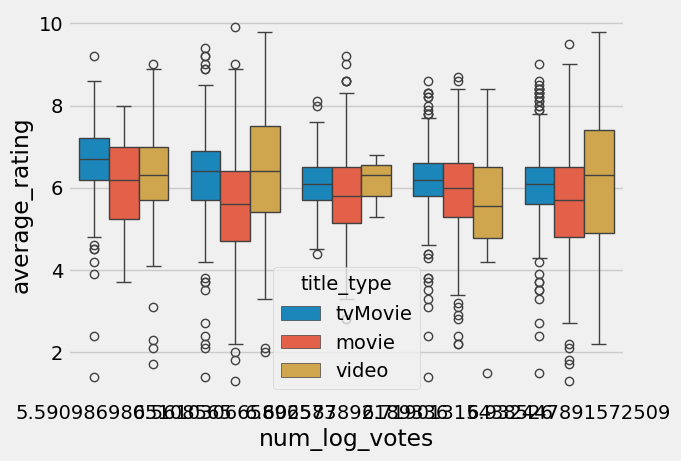

In [67]:
sns.boxplot(data = top_five,
              x = 'num_log_votes',
              y =  'average_rating',
              hue = 'title_type')

The rating of Holiday media decreased slightly with more votes. TV Movies appeared to have the most consistent decreases in ratings with more votes.